# **AirBnB Listing Analysis**

---

*Analyze AirBnB listings in Paris to determine the impact of recent regulations*

### **Objective 1**

---



Import the Listings csv file

Cast host_since column to **datetime** format

Filter the data down to rows where the city is Paris

Keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’

QA the Paris listings data: check for missing values

Calculate the minimum, maximum, and average for each numeric field

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [15]:
listings = pd.read_csv('/content/drive/My Drive/AirBnB Listing Analysis/Listings.csv', low_memory=False, encoding="ISO-8859-1", parse_dates = ['host_since'])

In [16]:
pd.set_option('display.max_columns', None)
display(listings.head())

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [17]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [74]:
listings_paris = listings.query('city == "Paris"')

In [75]:
listings_paris = listings_paris[['host_since','neighbourhood', 'city', 'accommodates', 'price']]

In [76]:
listings_paris

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [77]:
listings_paris.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [78]:
display(listings_paris.isnull().sum())

,0
host_since,33
neighbourhood,0
city,0
accommodates,0
price,0


In [79]:
listings_paris.query('price == 0').count()

,0
host_since,62
neighbourhood,62
city,62
accommodates,62
price,62


In [80]:
listings_paris.query('accommodates == 0').count()

,0
host_since,54
neighbourhood,54
city,54
accommodates,54
price,54


In [103]:
listings_paris.query('accommodates == 0 and price == 0').count()

,0
host_since,54
neighbourhood,54
city,54
accommodates,54
price,54


### **Objective 2**

---



Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)

Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

In [108]:
#paris_listings_neighbourhood = listings_paris.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
#Another method
paris_listings_neighbourhood = listings_paris.groupby('neighbourhood').agg({'price':'mean'}).sort_values('price')
paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [92]:
paris_listings_accomodates = listings_paris.query('neighbourhood == "Elysee"').groupby('accommodates').agg({'price':'mean'}).sort_values("price")
paris_listings_accomodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [93]:
paris_listings_accomodates.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [96]:
paris_listings_over_time = (
    listings_paris
    .set_index('host_since')
    .resample('YE')
    .agg({'neighbourhood':'count',
          'price':'mean'})
)

paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


### **Objective 3**


---


Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed

Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed

Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed

Based on your findings, what insights do you have about the impact of the 2015 regulations on new hosts and prices?

Create a dual axis line chart to show both new hosts and average price over time

<Figure size 1000x800 with 0 Axes>

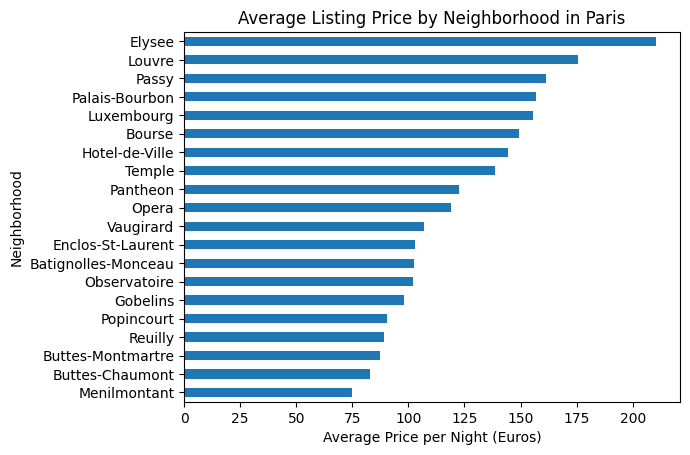

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
paris_listings_neighbourhood.plot(kind='barh', legend=False)
plt.title('Average Listing Price by Neighborhood in Paris')
plt.xlabel('Average Price per Night (Euros)')
plt.ylabel('Neighborhood')
plt.show()

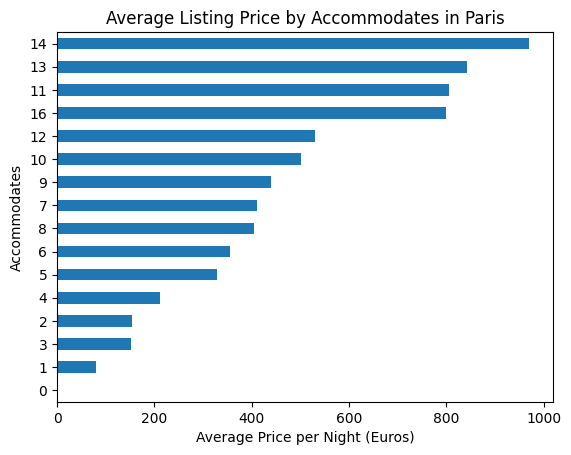

In [130]:
paris_listings_accomodates.plot(kind='barh', legend=False)
plt.title('Average Listing Price by Accommodates in Paris')
plt.xlabel('Average Price per Night (Euros)')
plt.ylabel('Accommodates')
plt.show()

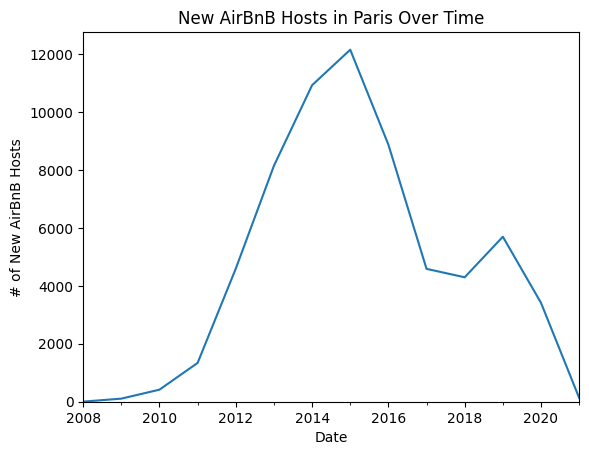

In [137]:
paris_listings_over_time.plot(kind = 'line', y = 'neighbourhood', legend=False)
plt.title('New AirBnB Hosts in Paris Over Time')
plt.xlabel('Date')
plt.ylabel('# of New AirBnB Hosts')
plt.ylim(0, )
plt.show()

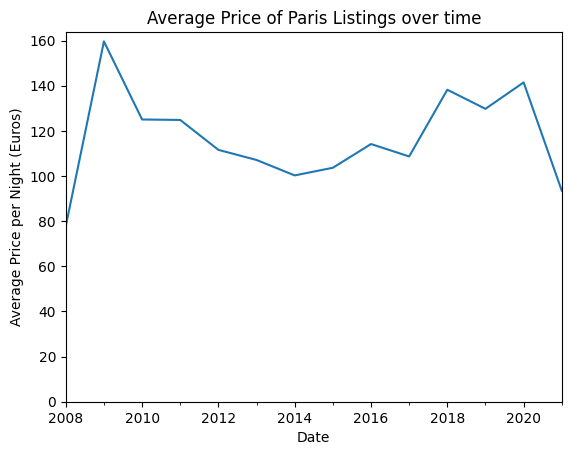

In [136]:
paris_listings_over_time.plot(kind = 'line', y = 'price', legend=False)
plt.title('Average Price of Paris Listings over time')
plt.xlabel('Date')
plt.ylabel('Average Price per Night (Euros)')
plt.ylim(0, )
plt.show()

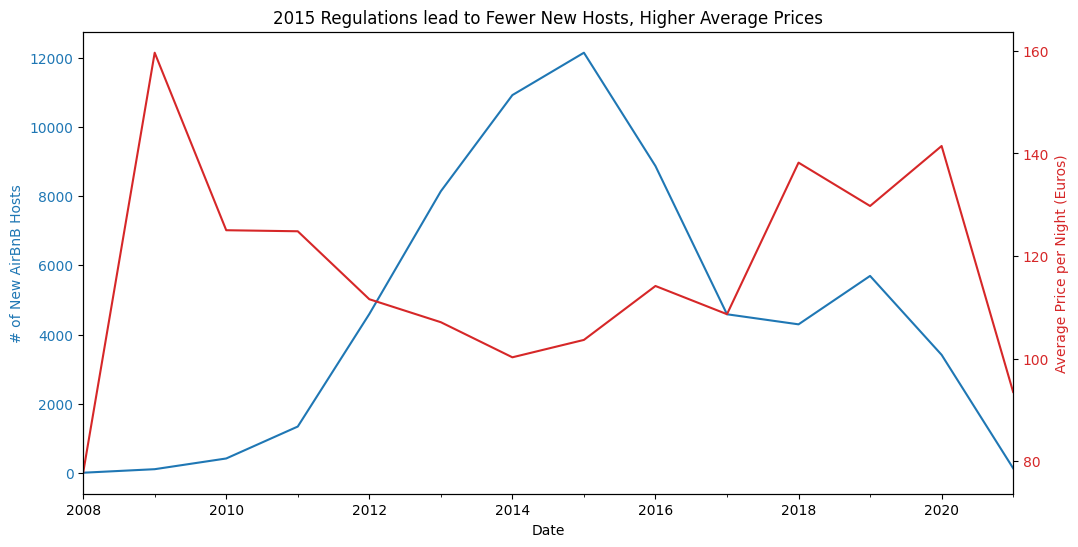

In [139]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the frequency of new hosts on the primary y-axis
paris_listings_over_time['neighbourhood'].plot(kind='line', ax=ax1, color='tab:blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('# of New AirBnB Hosts', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for the average price
ax2 = ax1.twinx()
paris_listings_over_time['price'].plot(kind='line', ax=ax2, color='tab:red')
ax2.set_ylabel('Average Price per Night (Euros)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('2015 Regulations lead to Fewer New Hosts, Higher Average Prices')
plt.show()